In [405]:
import os
import tarfile
import urllib.request

RES_PATH = os.path.join("res_datasets","resourceing")

def fetch_resource_data(res_path=RES_PATH):
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
##创建文件夹路径函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    #train_errors=train_errors[12:]
    #val_errors = val_errors[12:]
    plt.plot(np.sqrt(train_errors), "r-",linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    X_train
fetch_resource_data() ##调用创建

##读取CSV文件
import pandas as pd
pd.set_option('display.max_rows', None)  # 设置显示最大行
def load_res_data(res_path = RES_PATH,file_name="lable.csv"):
    csv_path = os.path.join(RES_PATH,file_name)
    return pd.read_csv(csv_path) 





In [406]:
##数据处理
resource_origin_data = load_res_data()  #get origin csv data

#%matplotlib inline
#import matplotlib.pyplot as plt
#resource_origin_data.hist(bins=50, figsize=(20,15))
#plt.show() #data plot show

resource_origin_data_lut = resource_origin_data.dropna(subset = ["LUT"])
resource_origin_data_lut=resource_origin_data_lut.drop("FF",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("BUFG",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("IO",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleName",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("PARAMETERVALUE",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleInsts",axis=1)




In [407]:
#数据信息
resource_origin_data_lut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ARITLSHIFT                 212 non-null    int64
 1   ARITLSHIFT_PORT_NUM        212 non-null    int64
 2   ARITLSHIFT_PORT_WIDTH      212 non-null    int64
 3   ARITLSHIFT_VALUE           212 non-null    int64
 4   ARITRSHIFT                 212 non-null    int64
 5   ARITRSHIFT_PORT_NUM        212 non-null    int64
 6   ARITRSHIFT_PORT_WIDTH      212 non-null    int64
 7   ARITRSHIFT_VALUE           212 non-null    int64
 8   AlwaysConstructs           212 non-null    int64
 9   AssignLHSPortNum           212 non-null    int64
 10  AssignLHSWidth             212 non-null    int64
 11  AssignRHSPortNum           212 non-null    int64
 12  AssignRHSWidth             212 non-null    int64
 13  AssignStmts                212 non-null    int64
 14  BLOCKINGASSIGN            

In [408]:
#相关性分析
corr_matrix=resource_origin_data_lut.corr()
corr_matrix["LUT"].sort_values(ascending=False)


LUT                          1.000000
CONDITIONALELSE              0.431417
NonBlockLeftWidth            0.417203
PLUS                         0.399622
NonBlockingAssign            0.393835
CONDITIONALTHEN              0.392870
CONDITIONALIF                0.392870
NonBlockingLeftPortNum       0.387136
REG                          0.318705
AlwaysConstructs             0.276555
CONDITIONALIFWIDTH           0.266208
REDAND                       0.251582
MIN                          0.232235
CASEITEMNUM                  0.232026
NonBlockRightWidth           0.229791
CASECONDITIONNUM             0.214073
OUTPUTWIDTH                  0.211457
AssignLHSWidth               0.201654
INPUTWIDTH                   0.192558
CASECONDITIONWIDTH           0.189411
AssignRHSWidth               0.180115
NonBlockingRightPortNum      0.179107
BlockAssign_Left_Width       0.143185
ARITRSHIFT_PORT_NUM          0.139558
WIREWIDTH                    0.136321
BLOCKINGASSIGN               0.133238
INPUT       

In [409]:
#特征优化
resource_lut = resource_origin_data_lut["LUT"].copy() #label data
resource_lut_data = resource_origin_data_lut.drop("LUT",axis=1) #feature data
resource_label = list(resource_lut_data) #labal list


In [410]:
#数据分割
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
#训练集、测试集、验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(resource_lut_data, resource_lut, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [411]:
#数据标准化
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train_full = scaler.transform(X_train_full)
X_data_full = scaler.transform(resource_lut_data)

In [418]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_full,y_train_full)
forest_predic = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test,forest_predic)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

62.93941509176124

In [419]:
from sklearn.metrics import r2_score
r2_score(y_test,forest_predic)

0.4917366425878045

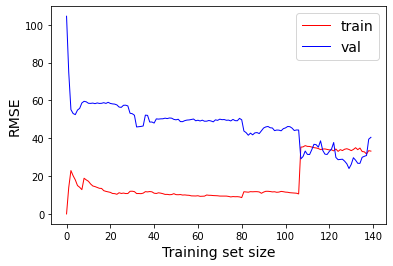

In [386]:
plot_learning_curves(forest_reg, X_train_full, y_train_full)
#plt.axis([0, 200, 0, 250])                         # not shown in the book
plt.show()    

In [420]:
#随机森林贡献度分析
feature_importance = forest_reg.feature_importances_
sorted(zip(feature_importance, resource_label), reverse=True)

[(0.2536180789116114, 'NonBlockLeftWidth'),
 (0.12679787008146579, 'REGWIDTH'),
 (0.05972747090195204, 'CASEITEMNUM'),
 (0.05392022363166385, 'NonBlockRightWidth'),
 (0.05128768920003244, 'OUTPUT'),
 (0.04534878622436089, 'OUTPUTWIDTH'),
 (0.04007377854061223, 'PLUS'),
 (0.031242549572939846, 'AssignRHSWidth'),
 (0.029140410023694496, 'AlwaysConstructs'),
 (0.027270609774432394, 'NonBlockingRightPortNum'),
 (0.02491683541531611, 'MIN'),
 (0.024909880571972985, 'NonBlockingAssign'),
 (0.02380947068617852, 'INPUTWIDTH'),
 (0.021759164863441625, 'CONDITIONALIFWIDTH'),
 (0.021244206715783292, 'CASECONDITIONNUM'),
 (0.01958116949331802, 'AssignRHSPortNum'),
 (0.019465579243440976, 'AssignLHSWidth'),
 (0.016465265343910046, 'NonBlockingLeftPortNum'),
 (0.013306102040150881, 'BlockAssign_Left_Width'),
 (0.010751248290526887, 'CASECONDITIONWIDTH'),
 (0.009990601557297826, 'AssignStmts'),
 (0.00795519530531399, 'REDAND'),
 (0.007563883396626128, 'CONDITIONALIF'),
 (0.007304643606240519, 'WIREWI

In [38]:
#随机搜索
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=10000),
    }

forest_reg = RandomForestRegressor(random_state=42)
forest_rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=100, cv=10, scoring='neg_mean_squared_error', random_state=42)
forest_rnd_search.fit(X_train_full, y_train_full)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=10),
                   n_iter=100,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A5BD9218E0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [63]:
#随机森林mse
forest_predict = forest_rnd_search.best_estimator_.predict(X_test)
forest_mse = mean_squared_error(y_test,forest_predict)
forest_mse

5788.630902531727

In [64]:
#随机森林rmse
forest_rmse = np.sqrt(forest_mse)
forest_rmse

76.0830526630716

In [65]:
#随机森林R方评估
from sklearn.metrics import r2_score
r2_score(y_valid,forest_predict)

0.04066686671625985

In [54]:
plot_learning_curves(forest_rnd_search.best_estimator_, X_data_full, resource_lut)
plt.axis([0, 200, 0, 300])                         # not shown in the book
plt.show()    

NameError: name 'forest_rnd_search' is not defined

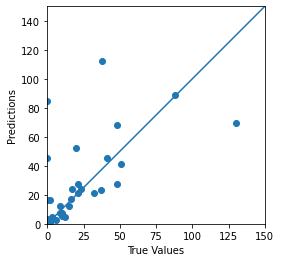

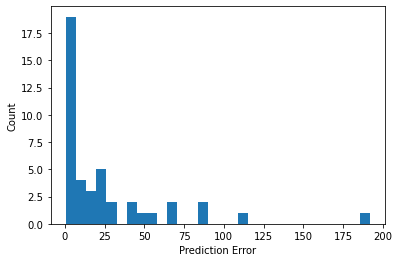

In [422]:
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_test,forest_predic)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,150]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)
    
plt.figure(2)
plt.clf()
plt.hist(forest_predic,bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)